In [1]:
import warnings
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [2]:
n = 10 ** 5

f = lambda x: 2 * np.sin(np.pi * x) ** 2
g1 = lambda x: stats.uniform.pdf(x)
rg1 = lambda n: stats.beta.rvs(a=1, b=1, size=n)
xx = np.linspace(0, 0.99, n)
a1 = np.min(g1(xx) / f(xx))
print(a1)
f1 = lambda x: f(x) * a1

0.5000000000999317


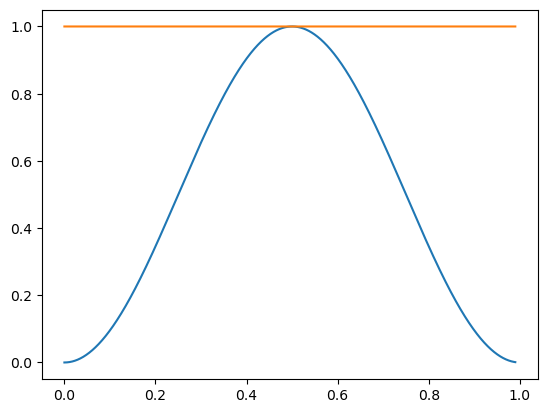

In [3]:
plt.plot(xx, f1(xx))
plt.plot(xx, g1(xx))
plt.show()

In [4]:
np.random.seed(1234)
x = rg1(n)
y = stats.uniform.rvs(0, np.max(x), n)
accepted = y < f1(x)
x_accepted = x[accepted]
y_accepted = y[accepted]
x_rejected = x[~accepted]
y_rejected = y[~accepted]

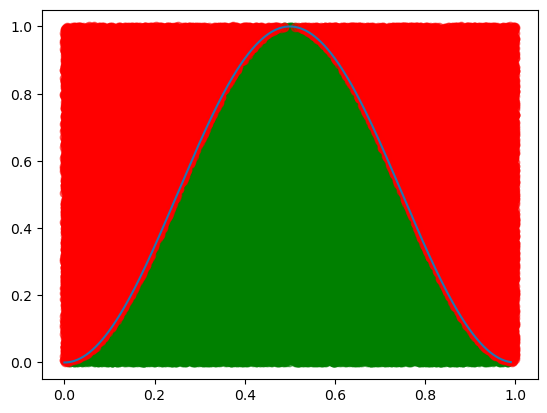

In [5]:
plt.scatter(x_accepted, y_accepted, color='green', alpha=0.5)
plt.scatter(x_rejected, y_rejected, color='red', alpha=0.5)
plt.plot(xx, f1(xx))
plt.show()

In [6]:
g2 = lambda x: stats.beta(a=3, b=3).pdf(x)
rg2 = lambda n: stats.beta(a=3, b=3).rvs(size=n)
a2 = np.nanmin(g2(xx) / f(xx))
print(a2)

f2 = lambda x: a2 * f(x)

0.9375000000354943


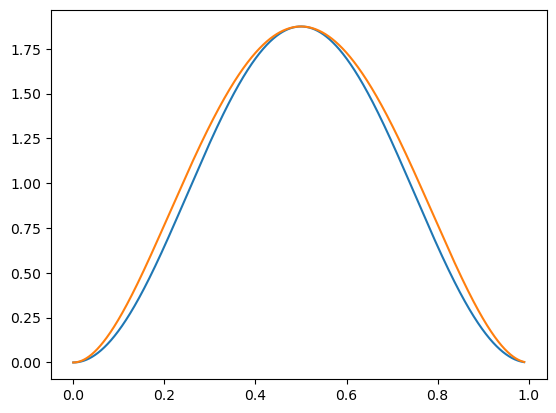

In [7]:
plt.plot(xx, f2(xx))
plt.plot(xx, g2(xx))
plt.show()

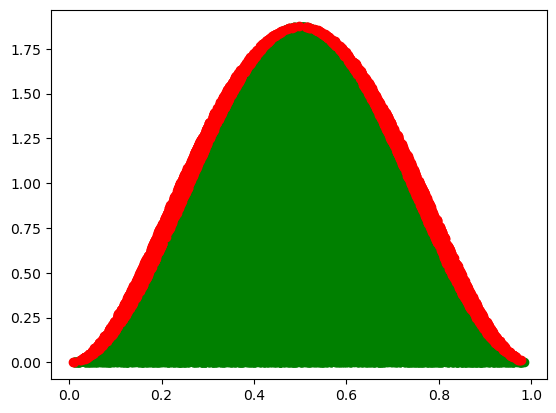

In [8]:
x = rg2(n)
y = stats.uniform.rvs(0, g2(x), size=n)
accepted = y < f2(x)
x_accepted = x[accepted]
y_accepted = y[accepted]
x_rejected = x[~accepted]
y_rejected = y[~accepted]

plt.scatter(x_accepted, y_accepted, color='green')
plt.scatter(x_rejected, y_rejected, color='red')
plt.show()

In [9]:
np.mean(accepted)

0.93791